# **📉 Customer Churn Analysis & Prediction**

### 📌 **Project Overview:**

Customer Churn occurs when a customer stops using a company’s services. High churn rates negatively affect revenue and growth. Predicting churn helps businesses identify high-risk customers and implement retention strategies.

**Objective**:

Predict whether a customer will churn (Yes/No) using the Telco Customer Churn dataset.

Provide actionable insights for business decision-making.

### **1️⃣ Define the Problem Clearly**
**🔍 Problem Statement**

Customer churn occurs when customers stop using a company’s services. Acquiring new customers is significantly more expensive than retaining existing ones, making churn reduction a key business priority.

**🎯 Machine Learning Objective**

- **Type:** Binary Classification

- **Target Variable:** Churn (1 = Yes, 0 = No)

**💼 Business Impact**

- Identify high-risk customers

- Enable proactive retention strategies

- Reduce revenue loss

**💼 Business Success Metric**

Capture ≥65% of churners by targeting the top 25% highest-risk customers.

**📌 Why Recall Matters:**
Missing a churner = lost revenue
False positives = acceptable marketing cost

➡️ Recall is prioritized over accuracy

### Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef,
    roc_auc_score, roc_curve, precision_recall_curve
)

import joblib
import pickle

import warnings
warnings.filterwarnings('ignore')

### 2️⃣ Collect & Load Data
**📂 Data Source**

Telecom subscription customer data
- 7043 customers

- 21 features

- Target: Churn

**📊 Feature Categories**
- Demographics: Gender, SeniorCitizen

- Services: InternetService, Streaming, TechSupport

- Account: Contract, Tenure

- Billing: MonthlyCharges, TotalCharges

### Load Dataset

In [2]:
dataset = pd.read_csv('customer_churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3️⃣ Data Cleaning & Preprocessing

#### *Analyzing the Data*

In [3]:
print("Dataset Shape:", dataset.shape)
print(dataset.info())
print(dataset.describe().T)

Dataset Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [4]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

#### *Check Missing Values*

In [5]:
print(dataset.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(), inplace=True)

In [7]:
print(dataset.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### *Check Duplicates*

In [8]:
print("Duplicates:" ,dataset.duplicated().sum())

Duplicates: 0


#### *Target Distribution*

In [9]:
print(dataset['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


#### *Churn Percentage Calculation*

In [10]:
churn_percentage = dataset['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Churn Percentage: {churn_percentage:.4f}%")

Churn Percentage: 26.5370%


#### *Encode Target Variable*

In [11]:
dataset['Churn'] = dataset['Churn'].map({'Yes': 1, 'No': 0})

#### *Encode Categorical Features*

In [12]:
le = LabelEncoder()
categorical_cols = dataset.select_dtypes(include='object').columns

for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])

### 4️⃣ Exploratory Data Analysis

#### *Target Distribution*

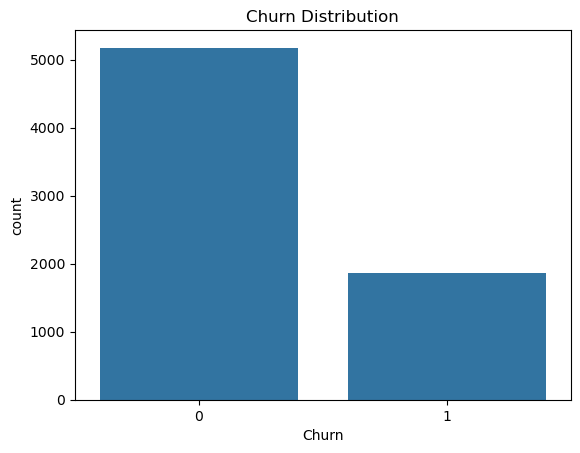

In [13]:
sns.countplot(x='Churn', data=dataset)
plt.title('Churn Distribution')
plt.show()

#### *Categorical Features Analysis*

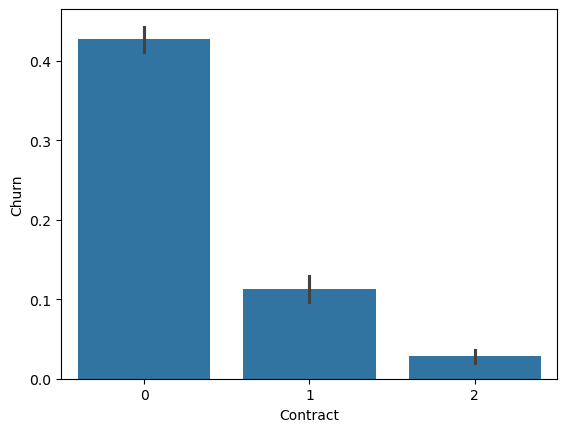

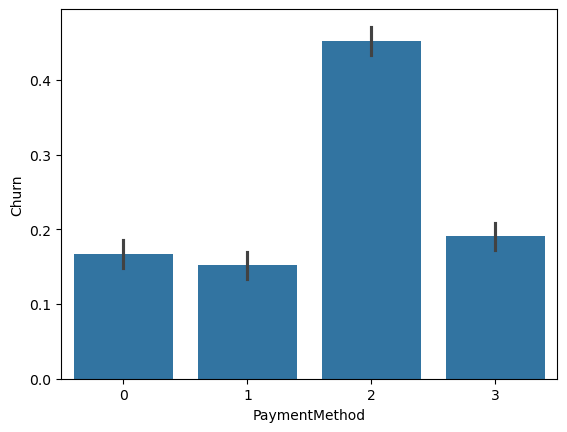

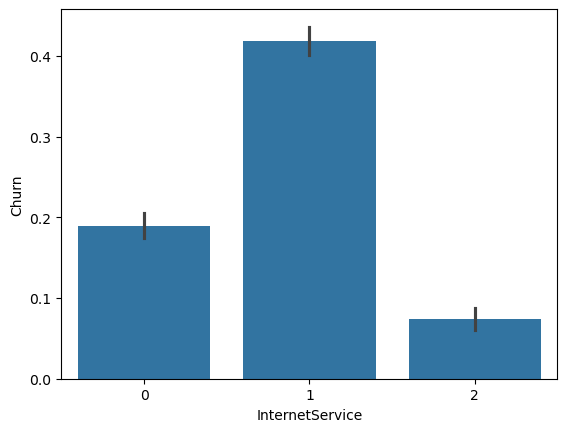

In [14]:
categorical_cols = ['Contract', 'PaymentMethod', 'InternetService']
for col in categorical_cols:
    sns.barplot(x=col, y='Churn' , data=dataset)
    plt.show()

#### *Numerical Features Analysis*

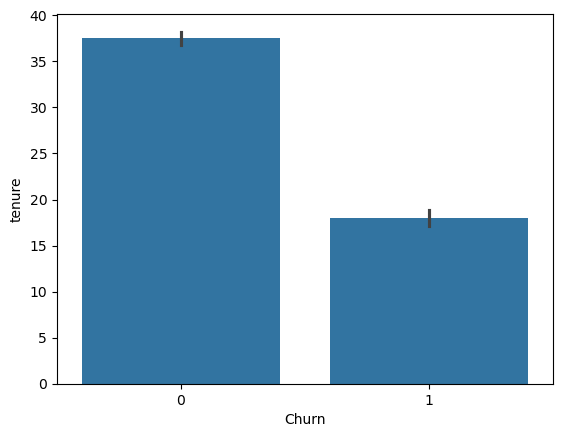

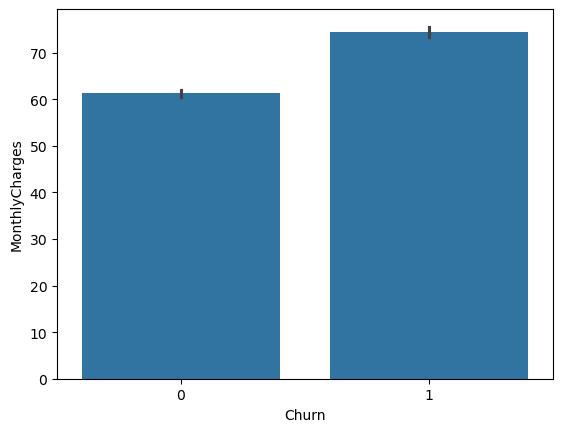

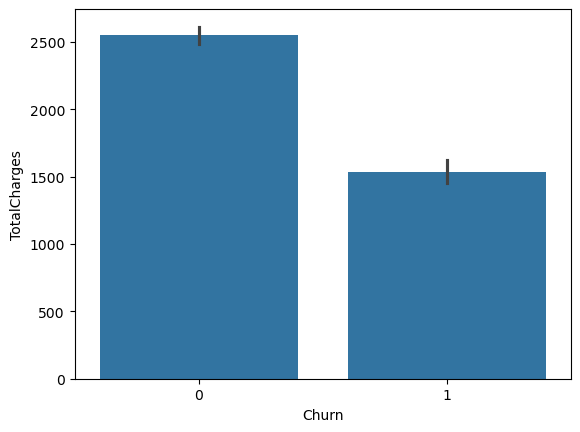

In [15]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    sns.barplot(x='Churn', y=col, data=dataset)
    plt.show()

#### *Correlation Analysis*

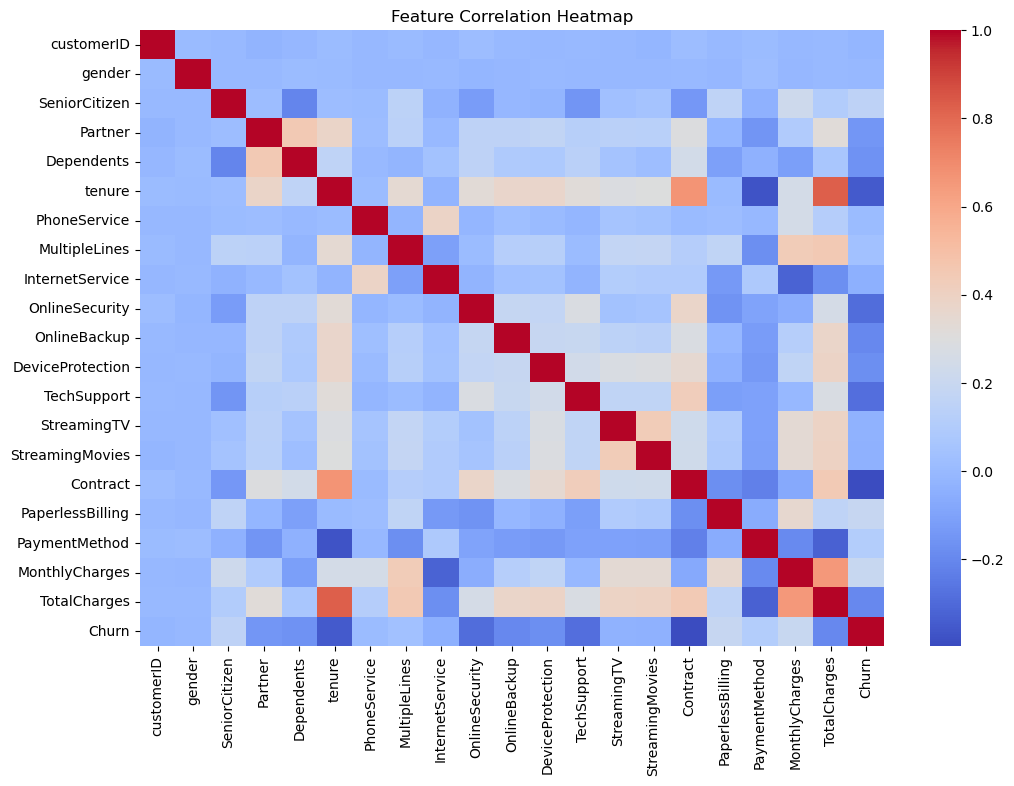

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### *Boxplots for Outlier Detection*

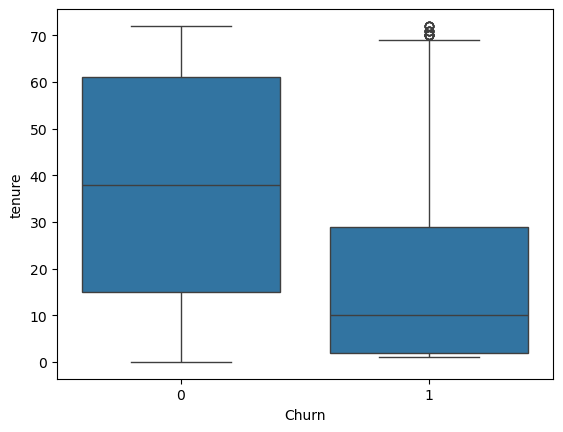

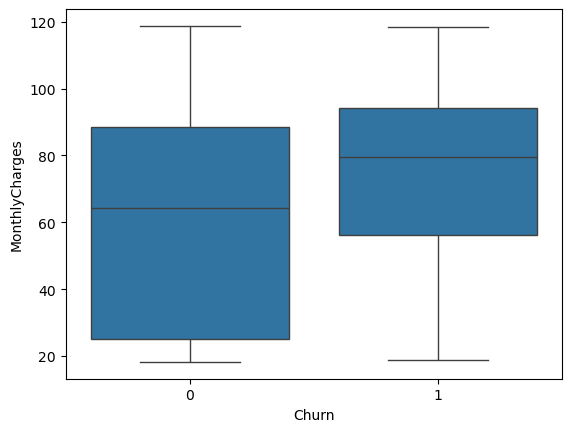

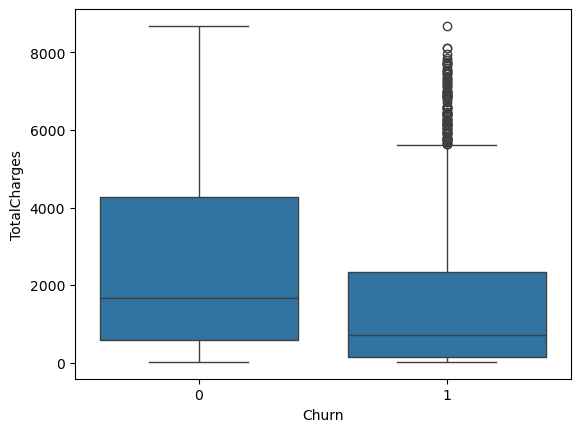

In [17]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    sns.boxplot(x='Churn', y=col, data=dataset)
    plt.show()

**🔍 EDA Insights**

- Customers with higher monthly charges churn more

- Short-tenure customers have higher churn

- Churn class is imbalanced, requiring careful evaluation

### 5️⃣ Feature Engineering

#### *Scale MonthlyCharges, TotalCharges and Tenure*

In [18]:
dataset["AvgMonthlySpend"] = dataset["TotalCharges"] / (dataset["tenure"] + 1)
dataset["Is_Long_Term_Contract"] = dataset["Contract"].isin(["One year", "Two year"]).astype(int)
dataset["High_Monthly_Charges"] = (
    dataset["MonthlyCharges"] > dataset["MonthlyCharges"].median()
).astype(int)

In [19]:
scaler = StandardScaler()

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

### 6️⃣ Train & Test split

#### *Split Features & Target*

In [20]:
X = dataset.drop(['customerID', 'Churn'], axis=1)
y = dataset['Churn']

#### *Split Dataset*

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 7️⃣ Choose & Train Model

### *Logistic Regression*

Accuracy : 0.7409510290986515
Precision: 0.5077989601386482
Recall   : 0.7834224598930482
F1 Score : 0.6161934805467929
MCC      : 0.457084662766274
ROC-AUC  : 0.8465550647136326


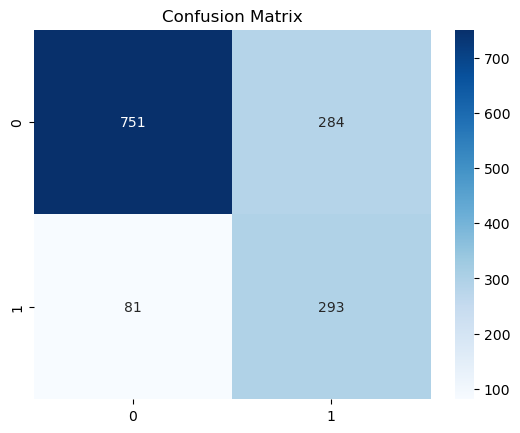

In [30]:
lr = LogisticRegression(class_weight='balanced', max_iter=2000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

def evaluate_model(y_test, y_pred, y_prob):
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("MCC      :", matthews_corrcoef(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

evaluate_model(y_test, y_pred_lr, y_prob_lr)

### *Random Forest Model*

Accuracy : 0.772888573456352
Precision: 0.5581896551724138
Recall   : 0.6925133689839572
F1 Score : 0.6181384248210023
MCC      : 0.4645684554680652
ROC-AUC  : 0.8400527009222661


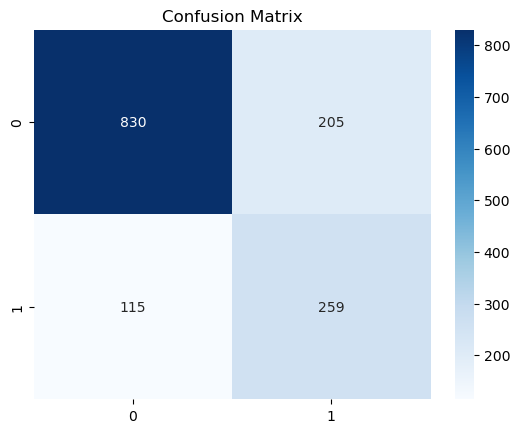

In [31]:
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred_rf, y_prob_rf)

### *Xgboost Model*

Accuracy : 0.7601135557132718
Precision: 0.533210332103321
Recall   : 0.7727272727272727
F1 Score : 0.631004366812227
MCC      : 0.47947203064182303
ROC-AUC  : 0.8349156526905888


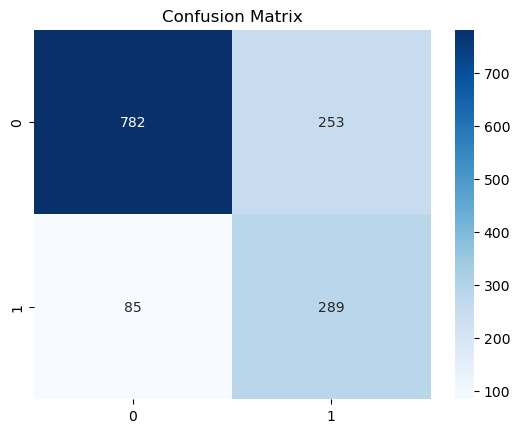

In [32]:
xgb = XGBClassifier(
    scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1]),
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="aucpr"
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_xgb, y_prob_xgb)

### 8️⃣ Evaluate Model

### *Cross Validation Scores*

In [33]:
cv_scores_lr = cross_val_score(lr, X, y, cv=5, scoring='f1', n_jobs=-1)
print("Logistic Regression CV F1:", cv_scores_lr.mean())

cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='f1', n_jobs=-1)
print("Random Forest CV F1:", cv_scores_rf.mean())

cv_scores_xgb = cross_val_score(xgb, X, y, cv=5, scoring='f1', n_jobs=-1)
print("XGBoost CV F1:", cv_scores_xgb.mean())

Logistic Regression CV F1: 0.6326140754613162
Random Forest CV F1: 0.6241717073836275
XGBoost CV F1: 0.6195847987402485


### *ROC Curve Comparison*

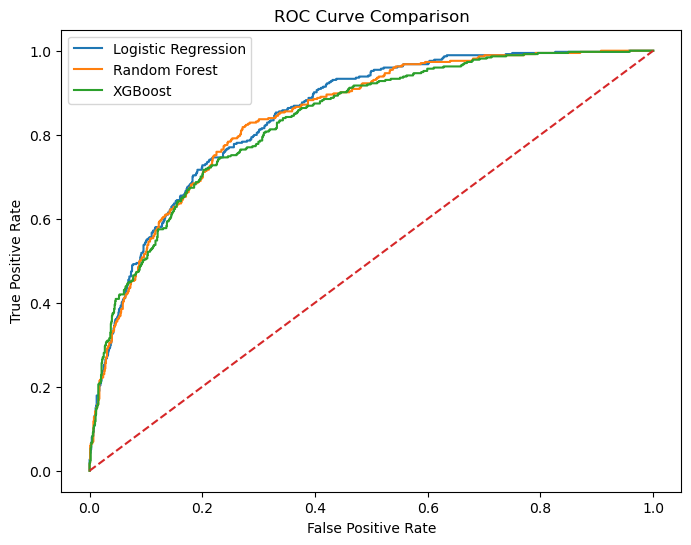

In [27]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [34]:
thresholds = np.arange(0.2, 0.8, 0.01)

f1_scores = []
accuracies = []

for t in thresholds:
    y_pred_t = (y_prob_rf >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))
    accuracies.append(accuracy_score(y_test, y_pred_t))

best_f1_t = thresholds[np.argmax(f1_scores)]
best_acc_t = thresholds[np.argmax(accuracies)]

best_f1_t, best_acc_t

(np.float64(0.4200000000000002), np.float64(0.6500000000000004))

### *Random Forest Model after tuning*

Accuracy : 0.7139815471965933
Precision: 0.4779969650986343
Recall   : 0.8422459893048129
F1 Score : 0.6098741529525653
MCC      : 0.4512317244611606
ROC-AUC  : 0.8435157198584309


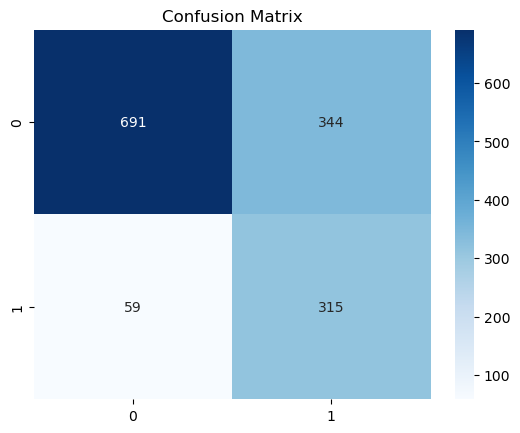

In [38]:
best_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=6,              # shallower trees
    min_samples_leaf=5,       # smoother splits
    min_samples_split=10,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)
y_prob_best_rf = best_rf.predict_proba(X_test)[:,1]
y_pred_best_rf = (y_prob_best_rf >= best_f1_t).astype(int)
evaluate_model(y_test, y_pred_best_rf, y_prob_best_rf)

In [39]:
import pandas as pd

importances = pd.Series(
    best_rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

selected_features = importances[importances > importances.mean()].index
selected_features

Index(['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'TotalCharges',
       'MonthlyCharges', 'InternetService', 'AvgMonthlySpend'],
      dtype='object')

In [41]:
# Save model
with open("churn_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save threshold
with open("threshold.pkl", "wb") as f:
    pickle.dump(best_f1_t, f)

# Save feature order
with open("features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("✅ All pickle files saved")

✅ All pickle files saved
